# FIT 1043 Introduction to Data Science

## Assignment 2

Name: Goh Jia Xuan  
Monash ID: 33589666

### Introduction

The main purpose of this report is to focus on analysing data, conducting machine learning to build models and performing prediction using models created. Machine learning can be categorised into supervised machine learning and unsupervised machine learning. In this report, we will study both type of machine learning algorithm by building classification model (supervised ML) via different algorithm approaches such as Support Vector Machine, Decision Tree, and Random Forest algorithms, as well as building clustering model (unsupervised ML) via k-means, where k represent the number of clusters and mean represent the measuring range of each cluster.  

Report outline:  
1. Introduction  
2. Understanding on supervised machine learning  
3. Understanding and building classification models
4. Perform independent evaluation 
5. Dataset selection and building k-mean clustering model
6. Conclusion

### Part A: Classification

<b>A1. Supervised Learning</b>  

<b>1. Explain supervised machine learning, the notion of labelled
data, and train and test datasets.</b>

Supervised machine learning is a machine learning that used all data that is labelled and the algorithm learn to predict the output from the input data.The goal mainly is to approximate the mapping function to the extent that when we have a new input data x, we can predict the output y from that dataset. In other words, it uses labelled training to learn the relationship between the inputs and the outputs. Example of supervised machine learning problems can be categorised into classification problem that provide categorical output, or regression problem that provide real value output. The example of algorithm implemented for classification problems is support vendor machines (SVM) while for regression problems is linear regression. Random forest(RF) is an algorithm for both classification and regression problems in supervised machine learning.

Labelled data can be defined as data that contains inputs features and the correct known outputs, which are the labels. In other words, labelled data is a designation for pieces of data that have been tagged with one or more labels identifying properties, classification of contained objects. For example, we have a model to identify the shoe size of a person based on their age.Eg. we want to know the shoe size of a 15 years old boy, then we will used labelled dataset where each data contains the age(inputs) and the shoe size(output) to try finding the shoe size belongs to that boy.

Train dataset and test dataset are the subset of original dataset that is used to build a model. In simple word, training dataset is the dataset that is used to train the test dataset. Train dataset is labelled dataset that are sent to an appropriate learning algorithm to form a model. The model will apply to test dataset to generate predictions. The prediction will match again with the labels in test datasets to verify the correctness of the prediction made. The model can keep training and adjusting the labels or increase training data to minimize the errors. Note that test dataset cannot be equivalent to training dataset otherwise the model will not perform well.

From lecture note  
https://cloud.google.com/discover/what-is-supervised-learning#:~:text=Supervised%20learning%20is%20a%20category,the%20input%20and%20the%20outputs.

<b>2. Read the ‘FIT1043-MusicGenre-Dataset.csv’ file and separate
the features and the label</b>
(Hint: the label, in this case, is the ‘music_genre’)  

Code:  
Read file and perform basic auditing before starting.

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# read file
music_dataset = pd.read_csv('FIT1043-MusicGenre-Dataset.csv')

# basic auditing - get the head 5 rows
music_dataset.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,77382,Sheena Ringo,獣ゆく細道,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560,1
1,23554,empty_field,Fossil Roo,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331,1
2,82886,The Beatles,Dear Prudence - 2018 Mix,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690,9
3,37772,Pink Floyd,Have a Cigar,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200,9
4,80191,A-Trak,Push,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960,5


In [3]:
# basic auditing - get the number of rows and columns
music_dataset.shape

(25958, 15)

In [4]:
# basic auditing - get the data type of each columns
music_dataset.dtypes

instance_id           int64
artist_name          object
track_name           object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
music_genre           int64
dtype: object

Seperate features and label

In [5]:
# separate features and label
# input data: all numerical rows and columns except music_genre columns
x = music_dataset.iloc[:, :-1]

# drop instance_id and categorical features of x
x = x.drop(columns = {'instance_id','artist_name','track_name'})

# labelled data: music_genre
y = music_dataset['music_genre']

In [6]:
# input data
x

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560
1,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331
2,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690
3,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200
4,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960
...,...,...,...,...,...,...,...,...,...,...,...
25953,57,0.01400,0.903,252245,0.545,0.004920,0.2240,-7.761,0.0380,120.017,0.9560
25954,13,0.99300,0.275,179240,0.409,0.825000,0.2150,-16.666,0.0322,77.858,0.2250
25955,43,0.01150,0.507,175040,0.660,0.336000,0.3220,-4.957,0.0306,100.783,0.6960
25956,50,0.00451,0.805,255147,0.744,0.000000,0.3500,-6.020,0.0572,124.983,0.5190


In [7]:
# labelled data
y

0        1
1        1
2        9
3        9
4        5
        ..
25953    5
25954    3
25955    2
25956    6
25957    8
Name: music_genre, Length: 25958, dtype: int64

<b>3. Use the sklearn.model_selection.train_test_split function to
split your data for training and testing.</b>  

Code:  
Note: we are keeping 80% for training data and 20% for testing data

In [8]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

<b>A2. Classification (training)</b>

<b>1. Explain the difference(s) between binary and multi-class
classification.</b>

First of all, classification is a supervised machine learning that uses labelled dataset to create models. It can be categorized into binary classification and multi-class classification.   

Binary classification classify a given data into two classes. It can be considered as one class that give positive result and the other class give negative result. For example, given a dataset containing patients health conditions that determine they have diabetes. Binary classification will classify them into 2 classes, first one will be "patients with diabetes" and the second one will be "patients without diabetes". Some of the examples on the algorithms that are commonly used by binary classification is logistic regression, decision trees, support vector machine, etc.  

Multi-class classification classify a given data into more than two classes and each entity should only belongs to one class only. For example, given a dataset containing a group of pets images. Multi-class classification will classify each images into different classes such as "Cat", "Dog", "Fish" and "Bird". Some of the examples on the algorithms that are commonly used by multi-class classification are face classification, optical charcater recognition, and species classification.  
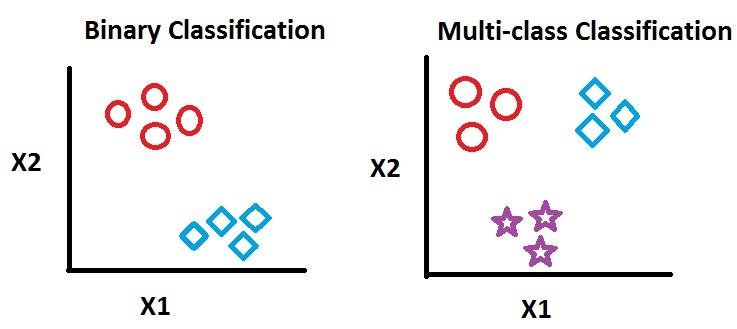
Figure 1.  Binary vs Multi-class classification model

References:  
https://www.analyticssteps.com/blogs/binary-and-multiclass-classification-machine-learning 
https://www.researchgate.net/figure/Binary-vs-Multiclass-classification_fig1_342987800

<b>2. In preparation for classification, your data should be normalised/scaled.</b>    

    a. Describe what you understand from this need to normalise data (this is in your Week 7 applied session).  

Feature scaling or normalization is a data preprocessing technique that is necessary on building models with better accuracy. According to Aniruddha Bhandari (2024), normalization is a technique that shifts and rescale values with the aim of ranging the values between 0 and 1, also known as min-max scaling.  
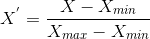  
Figure 2.  Calculation for min-max scaling

Tha main purpose is to have a more consistence distribution and reduce the impact of outliers to the model. For instance, if we have a features that has abnormally larger values than the others, without normalisation, this feature may dominate the overall scale and model performance, as well as encoutering overfitting issue. As a contrary, if we perform normalisation before creating model, we can reduce the risk of combating with these issue.

Bhandari, A. (2024). <i>Feature scaling: Engineering, normalization, and standardization (Updated 2024).</i> Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/  

Lecture note.
http://localhost:8888/files/Documents/GJX/cs/FIT1043/Week%207%20Applied%20Session%20material-20240417/Week%207%20Applied%20Session%20Activity.pdf

    b. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately.

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [10]:
# perform normalization on training dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  # applied to testing dataset
x_train

array([[ 1.14673242, -0.88201303,  0.28553608, ..., -0.60149372,
        -1.18222766,  0.13785054],
       [ 0.50423752,  0.60484486,  1.40492035, ..., -0.38637287,
        -0.42741443,  0.14591452],
       [-1.68024514, -0.89710756, -0.68832823, ..., -0.20824112,
         1.92474787,  1.72242145],
       ...,
       [ 0.31148905,  0.02900786, -1.44950953, ..., -0.4924732 ,
         2.53896954,  0.44428156],
       [ 0.69698599, -0.64679677, -0.16221763, ...,  0.59578524,
        -1.13099348,  0.50072938],
       [ 0.05449109, -0.89057751, -0.13982994, ...,  1.03381413,
         0.32050001, -0.4104997 ]])

In [11]:
x_test

array([[-2.32274004, -0.82071708, -0.16781455, ..., -0.60733411,
         0.65141332, -0.43872361],
       [ 1.08248293, -0.85930109, -0.99056198, ...,  0.48871151,
         2.41531435, -0.88627417],
       [ 0.6327365 , -0.64562756,  0.81724361, ..., -0.61706808,
        -1.05206603,  0.92005603],
       ...,
       [-1.80874412,  1.82959461, -0.6267621 , ..., -0.23744305,
        -0.42241199, -0.32985996],
       [ 0.37573854, -0.89116212, -0.27415605, ..., -0.40194723,
        -0.56002824,  0.78296847],
       [ 0.18299007,  1.61036733,  0.42545911, ..., -0.55671744,
        -0.17418613,  0.04914683]])

<b>3. Use the Support Vector Machine algorithm to build the model.</b>

    a. Describe SVM. Again, this is not in your lecture content, you need to do some self-learning.  

According to Wikipedia, support vector machine(SVM) is a supervised machine learning algorithm that analyse data for classification and regression models. It is more commonly used in classification problems to solve convex optimization problem. Examples of types of SVM algorithms are Linear SVM and Non-linear SVM. 

Each object that needs to be classify is represented as a data point in an n-dimensional space and the coordinates of these data points are called features. After that, support vector machine will perform classification test by drawing a hyperplane, separating the two classes, a line in two-dimensional or a plane in three-dimensional. 

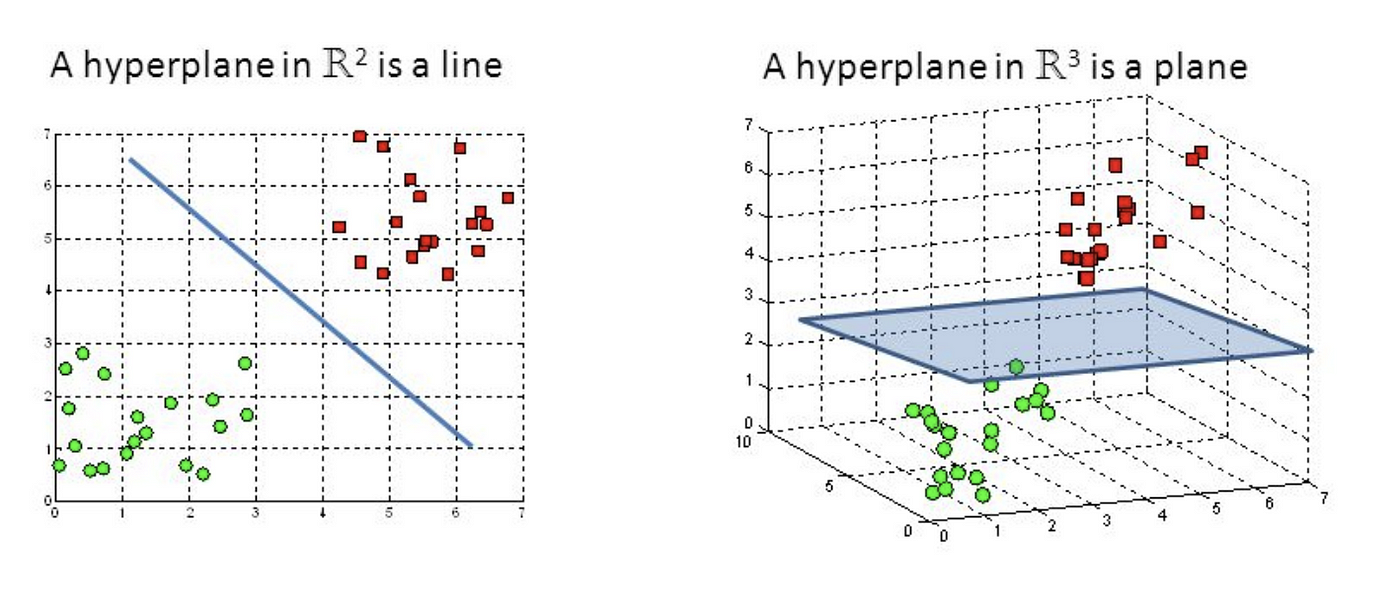 
Figure 3. Hyperplane in a line vs Hyperplane in a plane

There's possibility that SVM have multiple hyperplane but it will find the best hyperplane that separate the two classes perfectly. In other words, the distance of the hyperplane to points, also known as the margin, is maximized in both classes. The points that falls on the margin is then known as the supporing vectors. 

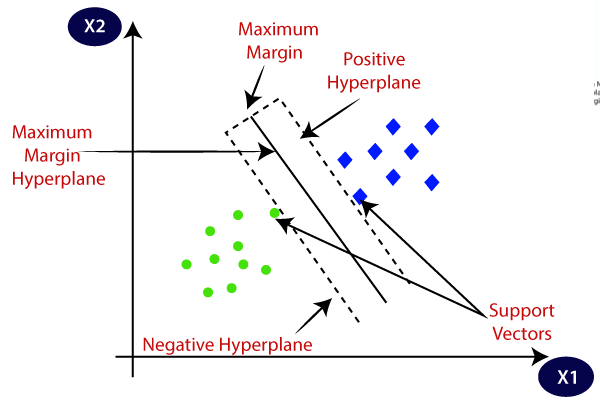  
Figure 4. Information on margin, supporting vectors, maximum margin

The advantages of using SVM algorithm are it is easy to understand, implement, use and interpret, especially effective in small training dataset. However, the simplicity of the algorithm can also lead to difficulty on finding the best hyperplane that separates the two classes. Some of the applications using SVM are face detection spam, medical diagnosis and text recognition.  

References:  
https://en.wikipedia.org/wiki/Support_vector_machine 
https://www.youtube.com/watch?v=_YPScrckx28  
https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

    b. In SVM, there is something called the kernel. Explain what you understand from it. 

As mentioned above, support vector machine(SVM) not only can work for linear data set, but also non-linear dataset via kernel, which makes it easier to classify the points and solve the issue of having difficulty on separating datasets via hyperplane (Saini, 2024). 

Before applying SVM on a non-linear dataset, we will need to apply non-linear transformation to the data points. However, the first issue is we need to choose what this non-linear transformation should be and it is better if computer can does it for us. The second issue is, if we need a complex decision boundary, we need to increase the dimension of the output of the non-linear transformation and this could lead to increase of computational requirement. Therefore, the "Kernel Trick" is introduced to solve both of this issues (Visually Explained, 2023).

We are getting a non-linear decision boundary by converting the non-linear data points from lower dimensional space to a higher dimensional space via quadratic functions, while remaining the internal operation of SVM. These quadratic functions are called kernels, and choosing the best kernel to be used will need to depends on dataset given and hyperparameter tuning. 

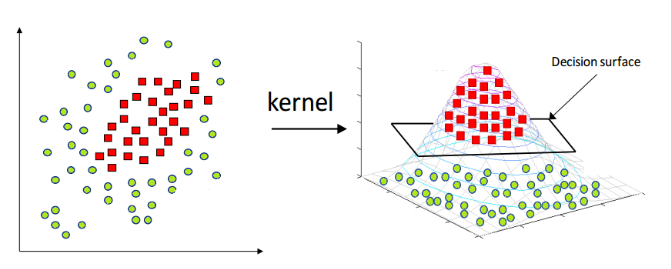  
Figure 5. The transformation of data points via kernel 

Some of the examples on the kernel functions are Polynomial kernel, Sigmoid kernel, RBF kernel, Bessel function kernel and Anova kernel. If the dataset is linearly separable, then linear kernel function would be a better choice. However, if our dataset is rather complex and linear kernel function doesn't seems to perform well, RBF and polynomial function should be considered.

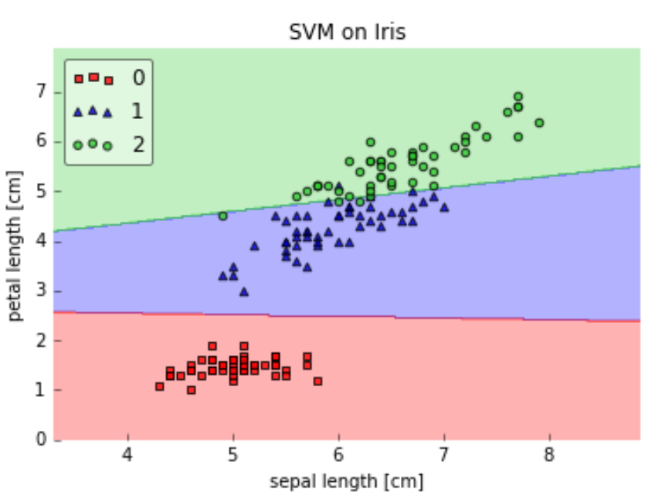
Figure 6. Example dataset that could implement linear kernel function

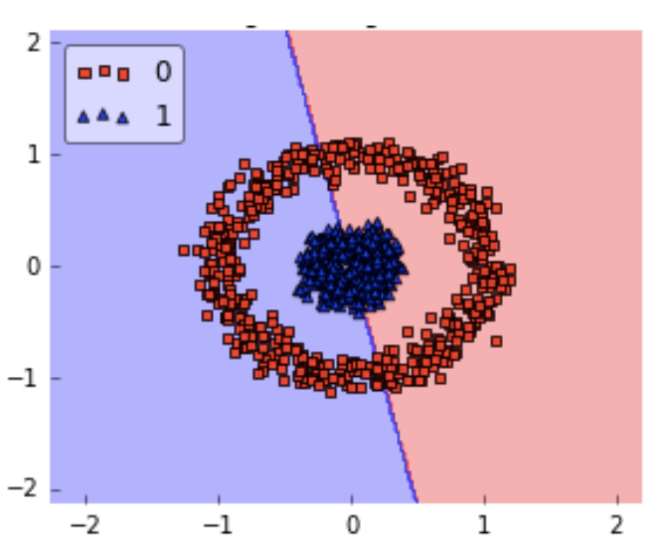
Figure 7. Example dataset that could implement RBF kernel function  


References:  
Saini, A. (2024). <i>Guide on support vector machine (SVM) algorithm.</i> Analystics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

Visually Explained. (2023). <i>The kernel trick in support vector machine(SVM).</i> Youtube. https://www.youtube.com/watch?v=Q7vT0--5VII


    c. Write the code to build a predictive SVM model using your training dataset.  
    (Note: You are allowed to engineer or remove features as you deem appropriate)
    
Code:  

In [12]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Perform feature engineering:   

In [13]:
# feature selection: SelectKBest
x_train_df = pd.DataFrame(x_train)
test = SelectKBest(score_func=f_classif,k='all')
fit = test.fit(x_train_df,y_train)

# feature selection result
fsr = pd.DataFrame({'feature':x_train_df.columns, 'score':fit.scores_})
fsr

# rename feature
fsr_renaming = {
    0:'popularity',
    1:'acousticness',
    2:'danceability',
    3:'duration_ms',
    4:'energy',
    5:'instrumentalness',
    6:'liveness',
    7:'loudness',
    8:'speechinesss',
    9:'tempo',
    10:'valence'
}

fsr['feature'] = fsr['feature'].map(fsr_renaming)
fsr

,feature,score
0,popularity,3751.868724
1,acousticness,1481.797545
2,danceability,1373.253111
3,duration_ms,143.142238
4,energy,1242.470162
5,instrumentalness,1202.340169
6,liveness,28.463932
7,loudness,2353.058842
8,speechinesss,894.026617
9,tempo,108.968456


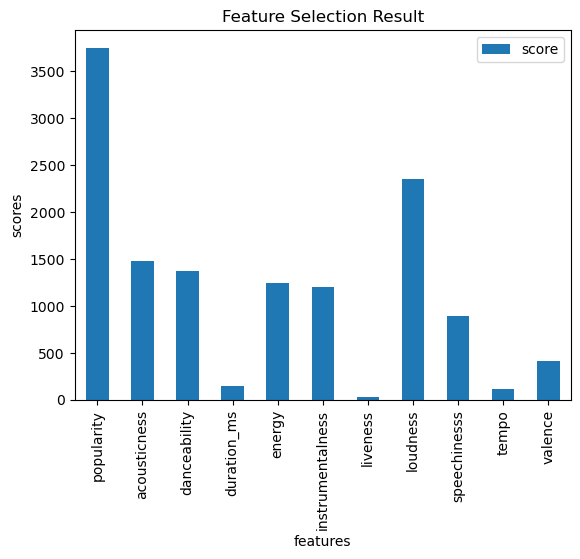

In [14]:
ax = fsr.plot.bar()
ax.set_xticklabels(fsr['feature'],rotation=90)
plt.xlabel('features')
plt.ylabel('scores')
plt.title('Feature Selection Result')
plt.show()

Among all features in music_dataset, liveness give the lowest score.  Therefore, liveness will not be used as training data. 

SVM model

In [15]:
# create new training data and labelled data
x = music_dataset.iloc[:, [3,4,5,6,7,8,10,11,12,13]]  # remove liveness, index 9
y = music_dataset['music_genre']

In [17]:
# split training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# standardisation and normalisation
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
  
# build SVM model with rbf kernel
svm_model = SVC(kernel='rbf',C=10, gamma=0.1, class_weight='balanced') 

# train the model on the training set
svm_model.fit(x_train, y_train)  

SVC(C=10, class_weight='balanced', gamma=0.1)

<b>4. Repeat Task A2.3.c by using another classification algorithm such as Decision Tree or Random Forest algorithms instead of SVM.</b>


Random Forest Classifier

In [18]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
classifier = RandomForestClassifier(
 n_estimators = 165,
 criterion = 'gini',
 random_state = 0, min_samples_split = 18, min_samples_leaf = 8, 
)

# train the model on training dataset
classifier.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=8, min_samples_split=18,
                       n_estimators=165, random_state=0)

<b>A3. Classification (prediction)</b>  

<b>1. Using the testing dataset you created in Task A1.3 above, conduct the prediction for the ‘music_genre’ (label) using the two models built by SVM and your other classification algorithm in A2.4.</b>

Prediction on SVM model

In [19]:
svm_pred = svm_model.predict(x_test)
svm_pred

array([0, 6, 2, ..., 0, 4, 0], dtype=int64)

Prediction on Random Forest Classifier

In [20]:
rf_pred = classifier.predict(x_test)
rf_pred

array([0, 6, 2, ..., 0, 4, 0], dtype=int64)

<b>2. Display the confusion matrices for both models (it should look like a 10x10 matrix). Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-class classification problem setting.</b>  

In [21]:
from sklearn.metrics import confusion_matrix

Confusion matrix of SVM model

In [22]:
cm_svm = confusion_matrix(y_test, svm_pred)
cm_svm

array([[206,   4,   8,   3,  86,  26,  42,  25,  26, 111],
       [ 15, 408,  36,  23,  11,  21,   0,   7,   0,   4],
       [ 28,  63, 273,   9,  63,  24,   2,  57,   0,  21],
       [ 17,  24,  14, 446,   2,   5,   0,  26,   0,   5],
       [ 40,   7,  21,   2, 294,  11,   9,  35,   6,  82],
       [ 29,  24,  33,   5,  30, 288,  14,  51,   7,  22],
       [ 18,   1,   1,   0,   8,   3, 225,   5, 198,  34],
       [ 25,   7,  67,  40,  31,  72,  15, 256,   3,  18],
       [ 20,   0,   0,   0,   4,   1, 207,   5, 194,  72],
       [ 41,   0,   2,   1,  36,   4,  20,  10,  23, 374]], dtype=int64)

Confusion matrix of Random Forest Classifier

In [23]:
cm_rf = confusion_matrix(y_test, rf_pred)
cm_rf

array([[175,   4,   6,   1,  79,  27,  46,  38,  20, 141],
       [ 15, 400,  27,  40,  14,  18,   0,   6,   0,   5],
       [ 30,  56, 267,  10,  61,  30,   4,  56,   1,  25],
       [ 17,  12,  13, 450,   4,  12,   0,  25,   0,   6],
       [ 26,  12,  22,   2, 310,   3,   7,  27,  11,  87],
       [ 34,  23,  39,   7,  20, 277,  12,  63,   4,  24],
       [ 13,   0,   0,   0,   4,   3, 244,   2, 192,  35],
       [ 20,   7,  70,  42,  28,  71,   9, 255,   3,  29],
       [ 11,   0,   0,   0,   4,   3, 249,   3, 160,  73],
       [ 30,   0,   0,   2,  23,   2,  32,  11,  25, 386]], dtype=int64)

<b>3. Compare the performance of SVM and your other classifier and provide your justification of which one performed better</b>

In [24]:
from sklearn.metrics import classification_report

Classification report of SVM model

In [25]:
svm_report = classification_report(y_test, svm_pred, zero_division=0)
print(svm_report)

              precision    recall  f1-score   support

           0       0.47      0.38      0.42       537
           1       0.76      0.78      0.77       525
           2       0.60      0.51      0.55       540
           3       0.84      0.83      0.84       539
           4       0.52      0.58      0.55       507
           5       0.63      0.57      0.60       503
           6       0.42      0.46      0.44       493
           7       0.54      0.48      0.51       534
           8       0.42      0.39      0.40       503
           9       0.50      0.73      0.60       511

    accuracy                           0.57      5192
   macro avg       0.57      0.57      0.57      5192
weighted avg       0.57      0.57      0.57      5192



Classification report of random forest classifier

In [26]:
rf_report = classification_report(y_test, rf_pred, zero_division=0)
print(rf_report)

              precision    recall  f1-score   support

           0       0.47      0.33      0.39       537
           1       0.78      0.76      0.77       525
           2       0.60      0.49      0.54       540
           3       0.81      0.83      0.82       539
           4       0.57      0.61      0.59       507
           5       0.62      0.55      0.58       503
           6       0.40      0.49      0.45       493
           7       0.52      0.48      0.50       534
           8       0.38      0.32      0.35       503
           9       0.48      0.76      0.58       511

    accuracy                           0.56      5192
   macro avg       0.56      0.56      0.56      5192
weighted avg       0.57      0.56      0.56      5192



Justification:    

For visualisation:  
    0:'popularity',  
    1:'acousticness',  
    2:'danceability',  
    3:'duration_ms',  
    4:'energy',  
    5:'instrumentalness',   
    6:'loudness',  
    7:'speechinesss',  
    8:'tempo',  
    9:'valence'      

Precision:   
SVM model shows a higher precision on each feature in a range of 42% to 84% while RF model shows a lower precision in a range of 38% to 81%. This indicates that when a positive value is predicted, SVM model have a higher possibility of predicting the value correctly.  

Recall:   
Although both SVM model and RF model have rather similar recall rate on each feature, RF model still have higher recall rate than SVM model in overall. This indicates that when the actual value is positive, RF model has higher possibility of predicting the value correctly.  

f1-score:  
SVM model shows higher f1-score in overall as compared to RF model. They both have same f1 score on 'acousticness' feature but SVM model still dominated. This indicates that SVM model has a higher possibility of getting correct positive predictions.  

Support:  
Both SVM model and RF model have same support on each feature. This indicates that both provide the same support within each class in testing dataset resulting in same reliability of performances.  

Accuracy:  
SVM model has a higher accuracy (57%) as compared to RF model (56%). This indicates that SVM model are more often to have correct prediction.  

Therefore, in overall, SVM model give a better performance.    

<b>A4. Independent evaluation</b>

<b>1. Read the ‘FIT1043-MusicGenre-Submission.csv’ file and use the best model you built earlier to predict the ‘music_genre’ for the songs in this file.</b>


In [44]:
submission_file = pd.read_csv('FIT1043-MusicGenre-Submission.csv')
submission_file.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,49290,The Wood Brothers,One Drop of Truth,27,0.06240,0.436,218227,0.663,0.001510,0.0759,-5.897,0.0510,117.956,0.360
1,81619,Pusha T,Hard Piano,62,0.03470,0.582,195733,0.778,0.000000,0.2100,-3.776,0.1780,82.193,0.205
2,31979,EXILE,運命のヒト - EXILE BALLAD BEST,35,0.69200,0.269,324480,0.331,0.000000,0.0851,-9.253,0.0338,139.338,0.250
3,35985,empty_field,Nobody,47,0.68200,0.428,256267,0.454,0.000005,0.2160,-9.952,0.4940,173.272,0.573
4,25426,Rammstein,OHNE DICH,48,0.00409,0.404,271173,0.599,0.000252,0.1130,-5.565,0.0289,136.045,0.195


In [45]:
x_train2 = submission_file.iloc[:, [3,4,5,6,7,8,10,11,12,13]]
x_train2 = sc.transform(x_train2)
svm_model2 = svm_model.predict(x_train2)
svm_model2

array([2, 8, 2, ..., 9, 0, 9], dtype=int64)

<b>2. Unlike the previous section in which you have a testing dataset where you know the ‘music_genre’ class and will be able to test for the accuracy, in this part, you don’t have a ‘music_genre’ and you have to predict it and submit the predictions along with other required submission files. </b>   

    a. Output of your predictions should be submitted in a CSV file format. It should contain 2 columns:   
    ‘instance_id’ and ‘music_genre’.   
    It should have a total of 6491 lines (1 header, and 6490 entries).  


In [46]:
genre_pred = pd.read_csv('FIT1043-MusicGenre-Submission.csv')
genre_pred.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,49290,The Wood Brothers,One Drop of Truth,27,0.06240,0.436,218227,0.663,0.001510,0.0759,-5.897,0.0510,117.956,0.360
1,81619,Pusha T,Hard Piano,62,0.03470,0.582,195733,0.778,0.000000,0.2100,-3.776,0.1780,82.193,0.205
2,31979,EXILE,運命のヒト - EXILE BALLAD BEST,35,0.69200,0.269,324480,0.331,0.000000,0.0851,-9.253,0.0338,139.338,0.250
3,35985,empty_field,Nobody,47,0.68200,0.428,256267,0.454,0.000005,0.2160,-9.952,0.4940,173.272,0.573
4,25426,Rammstein,OHNE DICH,48,0.00409,0.404,271173,0.599,0.000252,0.1130,-5.565,0.0289,136.045,0.195


In [47]:
instance_id = genre_pred['instance_id'].values
instance_id

array([49290, 81619, 31979, ..., 46657, 83211, 75522], dtype=int64)

In [49]:
data = {
    'instance_id':instance_id,
    'music_genre':svm_model2
}

df = pd.DataFrame(data)
df.to_csv('33589666_GohJiaXuan_v1.csv',index=False)

In [50]:
csv_file = pd.read_csv('33589666_GohJiaXuan_v1.csv')
csv_file.head()

,instance_id,music_genre
0,49290,2
1,81619,8
2,31979,2
3,35985,8
4,25426,0


### Part B: Selection of Dataset and Clustering

<b>B1. Selection of a Dataset with missing data, Clustering</b>  

<b>1. Select a suitable dataset that contains some missing data and at least two numerical features.</b>

https://www.kaggle.com/datasets/camnugent/california-housing-prices

<b>2. Perform k-means clustering, choosing two numerical features in your dataset, and apply k-means clustering to your data to create k clusters in Python (k >= 2)</b>

Before performing k-mean clustering, load file and perform data auditing

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [34]:
# load dataset
dataset = pd.read_csv('housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
# perform data auditing
# check dataset dimension
dataset.shape

(20640, 10)

In [36]:
dataset.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [37]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Handle missing value in total_bedroom column: Remove the rows with missing value  

Reason: Since the number of missing value detected in the dataset is less than 5% of my whole dataset, it will not hugely impact my result of k-mean clustering in overall. Therefore, I would use this method to handle missing value and build model for later task.

In [38]:
# dropping missing value
dataset = dataset.dropna()
dataset.shape

(20433, 10)

Two numerical features chosen:   
Independent variable: median_house_value  
Dependent variable: median_income

Text(0.5, 1.0, 'Visualisation of Raw Data')

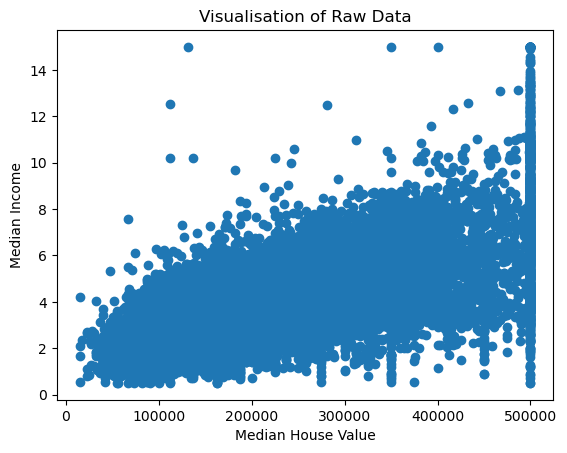

In [39]:
# visualise raw dataset via scatter plot
plt.scatter(x=dataset['median_house_value'],y=dataset['median_income'])
plt.xlabel('Median House Value')
plt.ylabel('Median Income')
plt.title("Visualisation of Raw Data")

Getting optimal number of clusters by performing Silhouette Analysis

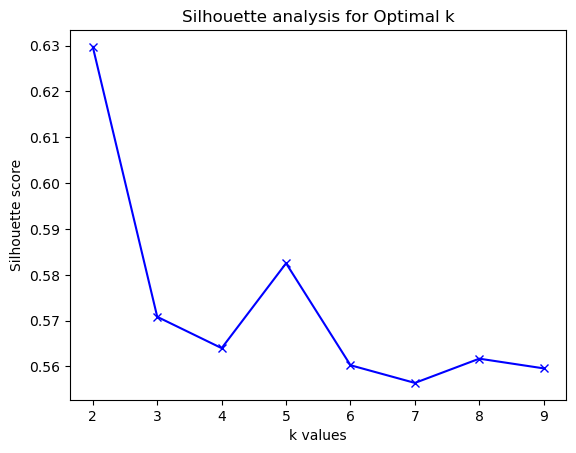

In [41]:
# Silhouette analysis
from sklearn.metrics import silhouette_score

num_clusters_range = [2,3,4,5,6,7,8,9]
silhouette_avg = []
dataset_analysis = dataset[['median_house_value','median_income']]

for num_clusters in num_clusters_range:
    # initialise k mean
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(dataset_analysis)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(dataset_analysis, cluster_labels))

plt.plot(num_clusters_range, silhouette_avg, 'bx-')
plt.xlabel('k values')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for Optimal k')
plt.show()

Maximum silhouette score at k = 2. We will take 2 clusters.

In [40]:
kmeans = KMeans(n_clusters=2, n_init=10).fit(dataset[['median_house_value','median_income']])
kmeans

KMeans(n_clusters=2, n_init=10)

In [41]:
# look at the output: cluster centroids
kmeans.cluster_centers_

array([[1.49741989e+05, 3.24547580e+00],
       [3.67296973e+05, 5.62844652e+00]])

In [42]:
# look at the output: cluster labels
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

<b>3. Visualise the data as well as the results of the k-means clustering, and describe your findings about the identified clusters.</b>

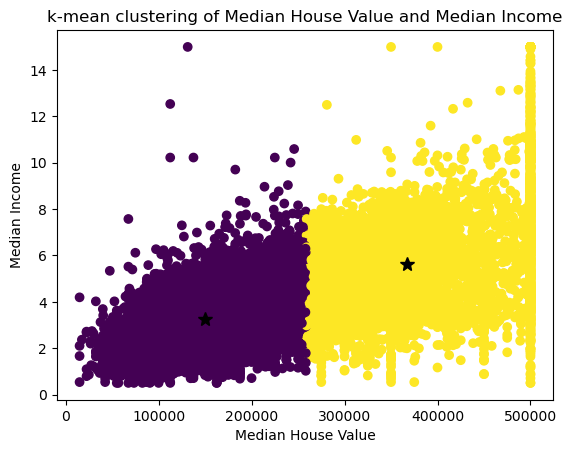

In [43]:
# Visualise the output labels
plt.scatter(
 x=dataset['median_house_value'],
 y=dataset['median_income'],
 c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
 kmeans.cluster_centers_[:,0],
 kmeans.cluster_centers_[:,1],
 'k*',
 markersize=10
)

# labelling the graph
plt.xlabel('Median House Value')
plt.ylabel('Median Income')
plt.title('k-mean clustering of Median House Value and Median Income')
plt.show()


Based on my observation, each clusters are well-separated and does not overlap each other much. The first cluster between the range of USD 0 to USD 270000, black star position at 3 while second cluster between USD 270000 to USD 500000, black star position at 6. The black stars is the centroid of each cluster, which is the mean of the location of all data points in a cluster. From scatter plot above, each cluster shows an increasing pattern and the black stars position become higher as the median house value increase. This indicate that in California, the increase of median house value will result in the increase of median income as well. There're some outliers being plotted on the graph as well, showing a relatively higher median income than the others. The factor that causes these outliers could be one's job position. 

Based on this observation, I have done some research on California's house value and income. Brown, R. (2024) claims that the cost of owning a home have grown more than citizens median income. It is not guarantee that there's a possibility of buying a house with their current income. There's data shows that buying a mortage on a mid-tier home in 2023 requires annual income of USD 224,000, which is 2.6 times of median income in 2022. For a botton-tier home, approximately USD 137,000 in annual income is required merely for a mortage, which is about 60% higher than median income in 2022.  

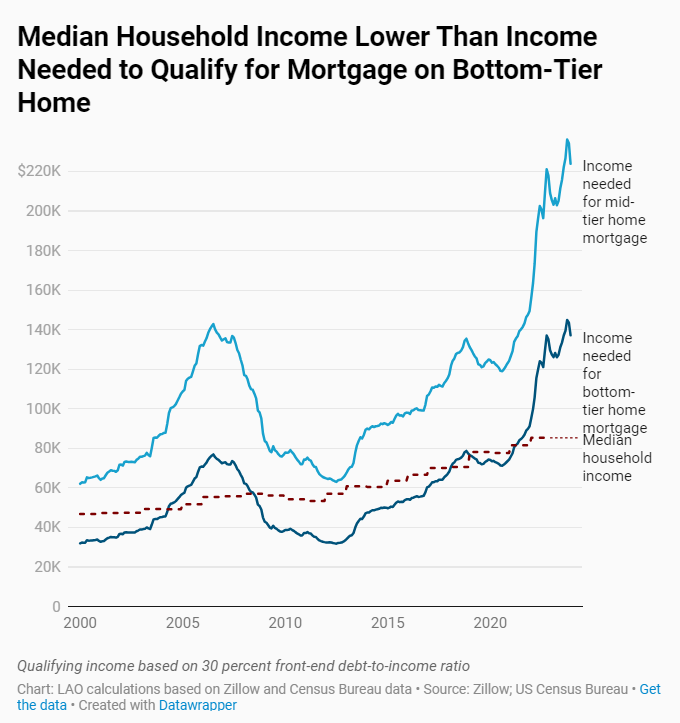  
Figure 8. Graph of qualified income for mid-tier and bottom-tier home in California  

Therefore, although median income increases when median house value increases, the increase of income amount is still relatively challenging for citizens in California to afford a house.  

References:  
https://lao.ca.gov/LAOEconTax/Article/Detail/793#:~:text=Affordability%20depends%20on%20both%20the,income%20in%202022%20(%2485%2C300).

### Conclusion

From this report, I have learnt on building classification models via Support Vendor Machine and Random Forest Classifier, analysing the confusion metrices outputed from the models and uses the model built to perform prediction. Besides, I also learnt on building clustering model via k-mean, evaluating the result based on the distibution of data points and position of centroid. 

In conclusion, different datasets can have different approaches on building models for data analysis and evaluation. It depends on the aim of data scientist, what do they want to know from the dataset, the data that is being collected,and etc.